# Project 3: Predictive Modelling on Datasets Provided by the Company Celtra
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science*

>To be able to run the code below, we first need to create a new environment from the **project_3_environment.yml** file. That environment would contain all the necessary packages to execute the code in this notebook.

In [1]:
# LIBRARIES
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
import datetime as dt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from google.colab import drive

warnings.filterwarnings('ignore')

In [9]:
# Function to plot the importance of different features in a model
def plot_feature_importances(model, X):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(platform_dummies.columns) + list(sdk_dummies.columns) + sel_cols)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

>Before running the next cell, the folder *Celtra example datasets (shared externally).zip* should be downloaded from the following link: https://drive.google.com/file/d/18rVfAmCZ5TmGLXSqlSzEvIGDFrTa44VC/view and unzipped into this folder containing the notebook *data_exploration.ipynb*.

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%cd /content/drive/My Drive/Project_3
cd = os.getcwd()

/content/drive/My Drive/Project_3


In [ ]:
usage_data = pd.read_csv('Celtra example datasets (shared externally)/Celtra platform usage data.csv',
                         parse_dates=['TIMESTAMP'])

In [ ]:
usage_data = usage_data.sort_values(by='TIMESTAMP', ascending=True)

In [12]:
sessions_data = pd.read_csv('Celtra example datasets (shared externally)/Celtra sessions data.csv',
                            parse_dates=['UTCDATE', 'ACCOUNTCREATIONDATE', 'CAMPAIGNCREATIONDATE', 'CREATIVECREATIONDATE'])

In [ ]:
sessions_data

,UTCDATE,ACCOUNTID,ACCOUNTCREATIONDATE,CAMPAIGNID,CAMPAIGNCREATIONDATE,CREATIVEID,CREATIVECREATIONDATE,PLATFORM,SDK,REQUESTEDSESSIONS,LOADEDSESSIONS,RENDEREDSESSIONS,SESSIONSWITHINTERACTION,VIEWABLETIME,CREATIVELOADATTEMPTS
0,2018-01-01,6340835793860707872,2013-09-05 14:27:13,-3494773834525559494,2017-03-01 15:27:49,12478290410483568,2017-03-01 15:32:58,Android,MobileWeb,7,5,5,0,23,7
1,2018-01-01,-3038031771419903297,2012-12-05 10:03:43,5485378998304268448,2017-11-10 11:28:17,690098116024760877,2017-11-15 14:00:24,DesktopPlatform,MRAID,1,1,1,0,1,1
2,2018-01-01,-3038031771419903297,2012-12-05 10:03:43,5485378998304268448,2017-11-10 11:28:17,-2600564554404124594,2017-12-04 06:36:00,Android,MRAID,653,591,460,1,5575,653
3,2018-01-01,-3038031771419903297,2012-12-05 10:03:43,-5062053752656366863,2017-12-01 14:09:43,-8073003132403577258,2017-12-07 14:38:49,Android,MRAID,1,0,0,0,0,1
4,2018-01-01,8447339450952725126,2013-06-18 08:39:53,3576384301902184893,2017-10-18 10:19:32,-3013790246984068713,2017-11-08 15:02:52,DesktopPlatform,MobileWeb,9,9,8,0,240,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823181,2019-12-31,-9094478818540588946,2019-07-01 13:29:43,447892359404069275,2019-11-14 23:32:53,5912399274526522989,2019-11-15 00:14:37,Android,MobileWeb,1,1,1,0,43,1
4823182,2019-12-31,-1260316383243630803,2016-03-30 13:53:28,-4096225786877614532,2019-11-07 19:51:45,-8033461910529642162,2019-11-08 03:10:47,IOS,MRAID,1584,1117,1043,3,24943,1584
4823183,2019-12-31,-9094478818540588946,2019-07-01 13:29:43,-2189103201072325558,2019-11-13 16:08:31,-6918054899191630844,2019-11-13 20:28:06,DesktopPlatform,MobileWeb,1,1,1,0,44,1
4823184,2019-12-31,1138006091116774735,2014-09-04 11:23:36,-1490526310944899983,2019-12-05 10:34:44,1714937250495585388,2019-12-05 10:38:35,IOS,MobileWeb,1,1,1,0,43,1


## Dummy variables for predicting viewable time

In [ ]:
camp_month = sessions_data['CAMPAIGNCREATIONDATE'].dt.month.astype(str).apply(lambda x: 'camp_m{}'.format(x))
camp_year = sessions_data['CAMPAIGNCREATIONDATE'].dt.year.astype(str).apply(lambda x: 'camp_{}'.format(x))
crea_month = sessions_data['CREATIVECREATIONDATE'].dt.month.astype(str).apply(lambda x: 'crea_m{}'.format(x))
crea_year = sessions_data['CREATIVECREATIONDATE'].dt.year.astype(str).apply(lambda x: 'crea_{}'.format(x))
camp_monthyear = camp_month + '_' + camp_year
crea_monthyear = crea_month + '_' + crea_year

camp_month_dummies = pd.get_dummies(camp_month)
camp_year_dummies = pd.get_dummies(camp_year)
crea_month_dummies = pd.get_dummies(crea_month)
crea_year_dummies = pd.get_dummies(crea_year)
platform_dummies = pd.get_dummies(sessions_data['PLATFORM'])
sdk_dummies = pd.get_dummies(sessions_data['SDK'])
camp_monthyear_dummies = pd.get_dummies(camp_monthyear)
crea_monthyear_dummies = pd.get_dummies(crea_monthyear)

## Baseline model for predicting viewable time

In [ ]:
X = pd.concat([camp_month_dummies, 
               camp_year_dummies, 
               crea_month_dummies, 
               crea_year_dummies, 
               #camp_monthyear_dummies,
               #crea_monthyear_dummies,
               platform_dummies, 
               sdk_dummies], axis=1)
X

,camp_m1,camp_m10,camp_m11,camp_m12,camp_m2,camp_m3,camp_m4,camp_m5,camp_m6,camp_m7,...,WebOS,WindowsPhone,AMP,AppleNews,MRAID,MobileWeb,Pandora,SafeFrame,VAST,VPAID
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823181,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4823182,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4823183,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4823184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### With month x year combinations (the variables crea_monthyear_dummies and camp_monthyear_dummies), the model becomes unneccessarily too big. Those additional features do not improve the performance of our model, so we do our classification without including them.

In [ ]:
y_true = sessions_data['VIEWABLETIME'].copy().values
for i in range(len(y_true)):
    if y_true[i] == 0:
        y_true[i] = 0
    elif ((y_true[i] > 0) & (y_true[i] <= 10)):
        y_true[i] = 1
    elif ((y_true[i] > 10) & (y_true[i] <= 60)):
        y_true[i] = 2 
    elif ((y_true[i] > 60) & (y_true[i] <= 300)):
        y_true[i] = 3
    elif ((y_true[i] > 300) & (y_true[i] <=3600)):
        y_true[i] = 4
    elif ((y_true[i] > 3600) & (y_true[i] <=18000)):
        y_true[i] = 5
    elif ((y_true[i] > 18000) & (y_true[i] <=86400)):
        y_true[i] = 6
    elif (y_true[i] > 86400):    # anything more than one day is put into its own category
        y_true[i] = 7
            
y_true

array([2, 1, 5, ..., 2, 2, 2], dtype=int64)

In [ ]:
np.unique(y_true, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([ 935237,  322235,  788828,  681480, 1025090,  604454,  331748,
         134114], dtype=int64))

In [ ]:
np.round((np.array(np.unique(y_true, return_counts=True)[1]) / len(sessions_data)) * 100, 2)

array([19.39,  6.68, 16.35, 14.13, 21.25, 12.53,  6.88,  2.78])

### If we exclude the last class (viewable time bigger than one day), there is no class imbalance in our dataset. The worst ratio between 2 classes is 1:3, which is not considered a class imbalance that might influence the performance of our model.

## Bernoulli Naive Bayes

In [ ]:
kfold = KFold(3, True, None)
clf = BernoulliNB()
scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
scores

### This Bernoulli Naive Bayes doesn't do well, because the features put into it are not really relevant; campaign and creative creation dates are not really related to the viewable time.

## Viewable time without the outliers

In [13]:
sessions_data_2 = sessions_data.loc[sessions_data['VIEWABLETIME'] <= 86400]

### We don't know how to interpret viewable time longer than one day (maybe it's a bug, maybe a certain webpage remained open the whole day, so even though the person wasn't looking at the webpage, because the webpage was open, the ad could also be viewed,...). Some numbers even go into millions, so it really doesn't make sense to put them and values like 5 or 10 seconds in the same basket. Therefore, from now on, we didn't do classification on those very large values. 

## Classification with different features generated from sessions_data

In [ ]:
sel_cols = ['ACCOUNTID', 'CREATIVEID', 'CAMPAIGNID', 'PLATFORM', 'SDK']
X = pd.DataFrame()
for col in sel_cols:
    X = pd.concat([X, sessions_data[col]], axis=1)

In [ ]:
X

,ACCOUNTID,CREATIVEID,CAMPAIGNID,PLATFORM,SDK
0,6340835793860707872,12478290410483568,-3494773834525559494,Android,MobileWeb
1,-3038031771419903297,690098116024760877,5485378998304268448,DesktopPlatform,MRAID
2,-3038031771419903297,-2600564554404124594,5485378998304268448,Android,MRAID
3,-3038031771419903297,-8073003132403577258,-5062053752656366863,Android,MRAID
4,8447339450952725126,-3013790246984068713,3576384301902184893,DesktopPlatform,MobileWeb
...,...,...,...,...,...
4823181,-9094478818540588946,5912399274526522989,447892359404069275,Android,MobileWeb
4823182,-1260316383243630803,-8033461910529642162,-4096225786877614532,IOS,MRAID
4823183,-9094478818540588946,-6918054899191630844,-2189103201072325558,DesktopPlatform,MobileWeb
4823184,1138006091116774735,1714937250495585388,-1490526310944899983,IOS,MobileWeb


In [ ]:
enc = OrdinalEncoder()
enc.fit(X.values)
X = enc.transform(X)

### Account ID, Creative ID and Campaign ID still remain categorical variables, it's just that they are turned into ordinary numbers, so that we can run Categorical Naive Bayes on them.

In [ ]:
X

array([[2.6600e+02, 3.1054e+04, 4.9320e+03, 0.0000e+00, 3.0000e+00],
       [9.8000e+01, 3.3320e+04, 1.2684e+04, 2.0000e+00, 2.0000e+00],
       [9.8000e+01, 2.2351e+04, 1.2684e+04, 0.0000e+00, 2.0000e+00],
       ...,
       [4.0000e+00, 7.7290e+03, 6.0620e+03, 2.0000e+00, 3.0000e+00],
       [1.7100e+02, 3.6788e+04, 6.6350e+03, 3.0000e+00, 3.0000e+00],
       [4.0000e+00, 5.5783e+04, 9.6520e+03, 3.0000e+00, 3.0000e+00]])

In [ ]:
clf = CategoricalNB()

In [ ]:
scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)

In [ ]:
scores

array([0.46710891, 0.46846949, 0.46602297, 0.46789621, 0.46696322])

## Classification with different features generated from sessions_data_2 (the dataset without rows containing viewable time greater than 1 day)

In [ ]:
sel_cols = ['ACCOUNTID', 'CREATIVEID', 'CAMPAIGNID', 'PLATFORM', 'SDK']
X = pd.DataFrame()
for col in sel_cols:
    X = pd.concat([X, sessions_data_2[col]], axis=1)    # we take the columns from sessions_data_2

Because now we are doing the classification on sessions_data_2, we also need a new y_true column.

In [15]:
y_true = sessions_data_2['VIEWABLETIME'].copy().values
for i in range(len(y_true)):
    if y_true[i] == 0:
        y_true[i] = 0
    elif ((y_true[i] > 0) & (y_true[i] <= 10)):
        y_true[i] = 1
    elif ((y_true[i] > 10) & (y_true[i] <= 60)):
        y_true[i] = 2
    elif ((y_true[i] > 60) & (y_true[i] <= 300)):
        y_true[i] = 3
    elif ((y_true[i] > 300) & (y_true[i] <= 3600)):
        y_true[i] = 4
    elif ((y_true[i] > 3600) & (y_true[i] <= 18000)):
        y_true[i] = 5
    elif (y_true[i] > 18000):
        y_true[i] = 6

    y_true

## Dummy Classifier to see what performance our models must beat

In [ ]:
X = X.values
clf = DummyClassifier(strategy='most_frequent', random_state=0)
kfold = KFold()
scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
scores

array([0.20415007, 0.22412309, 0.22882043, 0.22642656, 0.20954262])

In [2]:
scores = np.array([0.20415007, 0.22412309, 0.22882043, 0.22642656, 0.20954262])
print(np.average(scores))
print(np.std(scores))

0.218612554
0.009869676544054722


### Turning requested sessions into a categorical variable to be able to use it with Categorical Naive Bayes

In [ ]:
requested_sessions = sessions_data_2['REQUESTEDSESSIONS'].copy().values
for i in range(len(requested_sessions)):
    if ((requested_sessions[i] > 0) & (requested_sessions[i] <= 5)):
        requested_sessions[i] = 1
    elif ((requested_sessions[i] > 5) & (requested_sessions[i] <= 10)):
        requested_sessions[i] = 2 
    elif ((requested_sessions[i] > 10) & (requested_sessions[i] <= 100)):
        requested_sessions[i] = 3 
    elif ((requested_sessions[i] > 100) & (requested_sessions[i] <= 1000)):
        requested_sessions[i] = 4 
    elif ((requested_sessions[i] > 1000) & (requested_sessions[i] <= 10000)):
        requested_sessions[i] = 5 
    elif (requested_sessions[i] > 10000):
        requested_sessions[i] = 6

In [ ]:
req_sess_series = pd.Series(requested_sessions, index=sessions_data_2.index, name='requested sessions')

In [ ]:
X_df = pd.DataFrame(X, index=sessions_data_2.index)
X = pd.concat([X_df, req_sess_series], axis=1).values
X

array([[2.6600e+02, 3.1052e+04, 4.9320e+03, 0.0000e+00, 3.0000e+00,
        2.0000e+00],
       [9.8000e+01, 3.3317e+04, 1.2684e+04, 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [9.8000e+01, 2.2350e+04, 1.2684e+04, 0.0000e+00, 2.0000e+00,
        4.0000e+00],
       ...,
       [4.0000e+00, 7.7280e+03, 6.0620e+03, 2.0000e+00, 3.0000e+00,
        1.0000e+00],
       [1.7100e+02, 3.6785e+04, 6.6350e+03, 3.0000e+00, 3.0000e+00,
        1.0000e+00],
       [4.0000e+00, 5.5779e+04, 9.6520e+03, 3.0000e+00, 3.0000e+00,
        3.0000e+00]])

In [ ]:
enc = OrdinalEncoder()
enc.fit(X.values)
X = enc.transform(X)
kfold = KFold(10, True, None)
clf = CategoricalNB()
scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
scores

array([0.47515078, 0.47736016, 0.47552713, 0.47513686, 0.47496625,
       0.4760027 , 0.47560817, 0.47453546, 0.47445869, 0.47487668])

In [5]:
scores = np.array([0.57433228, 0.57424484, 0.57541261, 0.57295157, 0.57294304,
       0.57261461, 0.57293237, 0.57326719, 0.5740392 , 0.57339942])
print(np.average(scores))
print(np.std(scores))

0.5736137130000001
0.0008275505918317036


In [ ]:
kfold = KFold(10, True, None)
clf = CategoricalNB()
scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
scores

array([0.57433228, 0.57424484, 0.57541261, 0.57295157, 0.57294304,
       0.57261461, 0.57293237, 0.57326719, 0.5740392 , 0.57339942])

This is the best performance we got so far.

## Correlation matrix for the dataframe to see which features influence the classification the most

In [ ]:
enc = OrdinalEncoder()
enc.fit(X.values)
X = enc.transform(X)
X = pd.DataFrame(X, index=sessions_data_2.index)
X.columns = ['ACCOUNTID', 'CREATIVEID', 'CAMPAIGNID', 'PLATFORM', 'SDK']
y_series = pd.Series(y_true, index=sessions_data_2.index, name='labels')

In [ ]:
pd.concat([X, y_series], axis=1).corr()

,ACCOUNTID,CREATIVEID,CAMPAIGNID,PLATFORM,SDK,labels
ACCOUNTID,1.000000,-0.011119,-0.010433,0.009597,-0.067650,0.008137
CREATIVEID,-0.011119,1.000000,0.005559,-0.001555,-0.000090,-0.001943
CAMPAIGNID,-0.010433,0.005559,1.000000,0.003234,0.007772,-0.002199
PLATFORM,0.009597,-0.001555,0.003234,1.000000,0.038119,-0.160068
SDK,-0.067650,-0.000090,0.007772,0.038119,1.000000,-0.288432
labels,0.008137,-0.001943,-0.002199,-0.160068,-0.288432,1.000000


### We check the correlation between other features and 'requested sessions'.

In [ ]:
pd.concat([X, req_sess_series, y_series], axis=1).corr()

,ACCOUNTID,CREATIVEID,CAMPAIGNID,PLATFORM,SDK,requested sessions,labels
ACCOUNTID,1.000000,-0.011119,-0.010433,0.009597,-0.067650,-0.040643,0.008137
CREATIVEID,-0.011119,1.000000,0.005559,-0.001555,-0.000090,-0.001457,-0.001943
CAMPAIGNID,-0.010433,0.005559,1.000000,0.003234,0.007772,0.013867,-0.002199
PLATFORM,0.009597,-0.001555,0.003234,1.000000,0.038119,-0.211919,-0.160068
SDK,-0.067650,-0.000090,0.007772,0.038119,1.000000,0.022129,-0.288432
requested sessions,-0.040643,-0.001457,0.013867,-0.211919,0.022129,1.000000,0.694417
labels,0.008137,-0.001943,-0.002199,-0.160068,-0.288432,0.694417,1.000000


### We check the number of categories for the feature "CREATIVEID".

In [ ]:
sessions_data_2['CREATIVEID'].nunique()

62076

### Creative ID and Campaign ID are maybe features which are too big (have too many classes) and as such unhelpful when it comes to predicting the viewable time.

## Decision tree

In [14]:
platform_dummies = pd.get_dummies(sessions_data_2['PLATFORM'])
sdk_dummies = pd.get_dummies(sessions_data_2['SDK'])

### Decision tree on the features: "Platform", "SDK" and "Requested sessions".

In [ ]:
X = pd.concat([platform_dummies, sdk_dummies, sessions_data_2['REQUESTEDSESSIONS']], axis=1)
X = X.values
for depth in [5, 10, 50, 100]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    kfold = KFold(3, True, None)
    scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
    print(f"Scores for tree depth of {depth}:\n{scores}")

Scores for tree depth of 5:
[0.49293549 0.49259576 0.49261688]
Scores for tree depth of 10:
[0.51120456 0.51019818 0.51040355]
Scores for tree depth of 50:
[0.49996801 0.49979207 0.49986756]
Scores for tree depth of 100:
[0.50000704 0.49949649 0.49879336]


In [7]:
scores = np.array([0.51120456, 0.51019818, 0.51040355])
print(np.average(scores))
print(np.std(scores))

0.5106020966666667
0.0004341779667627593


In [ ]:
X = pd.concat([platform_dummies, sdk_dummies, req_sess_series], axis=1)     # decision tree with the same features as the last
X = X.values                                                                # model, with the only difference being that 
for depth in [5, 10, 50, 100]:                                              # "requested sessions" is a categorical variable now
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    kfold = KFold(10, True, None)
    scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
    print(f"Scores for tree depth of {depth}:\n{scores}")

Scores for tree depth of 5:
[0.45651386 0.45606174 0.4559113  0.45751929 0.45622906 0.45636555
 0.45687524 0.45706931 0.45738281 0.4570949 ]
Scores for tree depth of 10:
[0.47901507 0.47803194 0.47911206 0.47915472 0.47707754 0.47722896
 0.47839124 0.47736971 0.47883909 0.47893506]
Scores for tree depth of 50:
[0.4786248  0.47899375 0.47942982 0.47801163 0.47767468 0.47812039
 0.4783102  0.47935092 0.47735692 0.47755525]
Scores for tree depth of 100:
[0.47870158 0.47986172 0.47862369 0.47784529 0.47825262 0.47865142
 0.47702849 0.47785168 0.47887534 0.47790927]


Decision trees with depth bigger than 10 don't necessarily perform better than trees with smaller depth.

### Decision tree with different features

In [ ]:
sel_cols = ['REQUESTEDSESSIONS', 'LOADEDSESSIONS', 'RENDEREDSESSIONS', 'SESSIONSWITHINTERACTION', 'CREATIVELOADATTEMPTS']
X = pd.DataFrame()
for col in sel_cols:
    X = pd.concat([X, sessions_data_2[col]], axis=1)
X = pd.concat([platform_dummies, sdk_dummies, X], axis=1)
X = X.values
for depth in [5, 10, 50, 100]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    kfold = KFold(10, True, None)
    scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
    print(f"Scores for tree depth of {depth}:\n{scores}")

Scores for tree depth of 5:
[0.56443695 0.56337064 0.56387727 0.56535304 0.56356591 0.56480923
 0.56457464 0.56399243 0.560126   0.56034352]
Scores for tree depth of 10:
[0.60803185 0.60693356 0.60860043 0.60759596 0.60842982 0.60760023
 0.60750213 0.60934258 0.60731872 0.60791159]


KeyboardInterrupt: 

## Random forest on the same features

In [ ]:
sel_cols = ['REQUESTEDSESSIONS', 'LOADEDSESSIONS', 'RENDEREDSESSIONS', 'SESSIONSWITHINTERACTION', 'CREATIVELOADATTEMPTS']
X = pd.DataFrame()
for col in sel_cols:
    X = pd.concat([X, sessions_data_2[col]], axis=1)
X = pd.concat([platform_dummies, sdk_dummies, X], axis=1)
X = X.values
for depth in [5, 10]:
    clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=depth)
    kfold = KFold(5, True, 1)
    scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
    print(f"Scores for random forest with 10 estimators and depth of {depth}:\n{scores}")

Scores for random forest with 10 estimators and depth of 5:
[0.56249687 0.57174709 0.56978463 0.56469833 0.55936465]
Scores for random forest with 10 estimators and depth of 10:
[0.59988377 0.60364038 0.60406541 0.60339897 0.60258431]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, random_state=42)
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=10)
clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
print("Feature importances:\n{}".format(clf.feature_importances_))

Accuracy on training set: 0.604
Accuracy on test set: 0.604
Feature importances:
[5.63217450e-03 2.53010515e-03 2.24777340e-02 4.20407872e-03
 5.32919283e-05 3.34514104e-03 8.73854942e-07 2.37377201e-04
 2.46803217e-02 2.52945366e-02 0.00000000e+00 5.26723500e-04
 1.56384102e-02 7.23970619e-02 1.25739155e-01 1.76990157e-01
 3.47250394e-01 3.57763963e-02 1.37226067e-01]


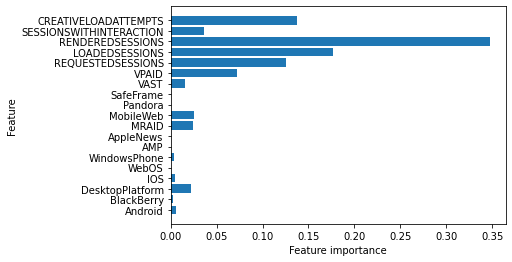

In [ ]:
plot_feature_importances(clf, X)

## The same random forest, but cross-validation done with a rolling time window

In [ ]:
sel_cols = ['REQUESTEDSESSIONS', 'LOADEDSESSIONS', 'RENDEREDSESSIONS', 'SESSIONSWITHINTERACTION', 'CREATIVELOADATTEMPTS']
X = pd.DataFrame()
for col in sel_cols:
    X = pd.concat([X, sessions_data_2[col]], axis=1)
X = pd.concat([platform_dummies, sdk_dummies, X], axis=1)
X = X.values

In [ ]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=10)
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
    print("Feature importances:\n{}".format(clf.feature_importances_))

TRAIN: [     0      1      2 ... 781509 781510 781511] TEST: [ 781512  781513  781514 ... 1563021 1563022 1563023]
Accuracy on training set: 0.599
Accuracy on test set: 0.605
Feature importances:
[5.26566238e-03 4.06363679e-03 2.70325520e-02 6.41986492e-03
 2.09905777e-04 7.04593759e-03 9.87417275e-08 1.17733377e-03
 2.98009634e-02 3.49369868e-02 0.00000000e+00 4.63203464e-04
 5.78054617e-03 2.05275126e-02 8.07122095e-02 2.54969359e-01
 3.48193942e-01 4.09157927e-02 1.32484492e-01]
TRAIN: [      0       1       2 ... 1563021 1563022 1563023] TEST: [1563024 1563025 1563026 ... 2344533 2344534 2344535]
Accuracy on training set: 0.598
Accuracy on test set: 0.599
Feature importances:
[3.83700130e-03 3.04584834e-03 2.42121367e-02 4.61959223e-03
 8.80827304e-05 3.92236454e-03 2.29428854e-07 3.73826699e-04
 2.21977395e-02 2.74891479e-02 0.00000000e+00 3.15653675e-04
 8.13089879e-03 4.76559090e-02 1.16416254e-01 2.22157133e-01
 3.55580548e-01 4.06961506e-02 1.19261483e-01]
TRAIN: [      0     

## Random forest with features **SDK**, **PLATFORM** and **REQUESTEDSESSIONS**

In [16]:
X = pd.concat([platform_dummies, sdk_dummies, sessions_data_2['REQUESTEDSESSIONS']], axis=1)
X = X.values
for depth in [5, 10]:
    clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=depth)
    kfold = KFold(5, True, 1)
    scores = cross_val_score(clf, X, y_true, scoring='accuracy', cv=kfold)
    print(f"Scores for random forest with 10 estimators and depth of {depth}:\n{scores}")

Scores for random forest with 10 estimators and depth of 5:
[0.44462287 0.42239248 0.42905736 0.42084571 0.41365559]
Scores for random forest with 10 estimators and depth of 10:
[0.50945122 0.50876772 0.50932488 0.51152894 0.50971941]


In [22]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=10)
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
    print("Feature importances:\n{}".format(clf.feature_importances_))

TRAIN: [     0      1      2 ... 781509 781510 781511] TEST: [ 781512  781513  781514 ... 1563021 1563022 1563023]
Accuracy on training set: 0.496
Accuracy on test set: 0.513
Feature importances:
[1.89944963e-02 1.13558313e-02 5.36312308e-02 1.71058897e-02
 7.33600687e-04 2.29226091e-02 1.21616518e-06 1.74601967e-03
 2.94908335e-02 4.06951366e-02 1.20142703e-06 1.03086154e-03
 1.05240503e-02 3.35344219e-02 7.58232601e-01]
TRAIN: [      0       1       2 ... 1563021 1563022 1563023] TEST: [1563024 1563025 1563026 ... 2344533 2344534 2344535]
Accuracy on training set: 0.504
Accuracy on test set: 0.510
Feature importances:
[3.16210051e-02 7.29547100e-03 5.28337646e-02 1.76595932e-02
 7.10229951e-04 1.63774322e-02 1.13272842e-06 1.55346139e-03
 2.89935404e-02 3.78855923e-02 2.42996453e-07 8.68928354e-04
 1.26527042e-02 5.36880531e-02 7.37858848e-01]
TRAIN: [      0       1       2 ... 2344533 2344534 2344535] TEST: [2344536 2344537 2344538 ... 3126045 3126046 3126047]
Accuracy on training 

In [18]:
scores = np.array([0.50945122, 0.50876772, 0.50932488, 0.51152894, 0.50971941])
print(np.average(scores))
print(np.std(scores))

0.5097584339999999
0.0009380914786011132


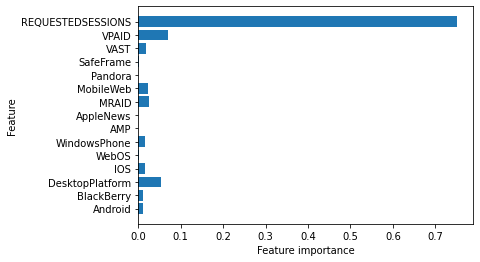

In [24]:
sel_cols = ['REQUESTEDSESSIONS']
plot_feature_importances(clf, X)
plt.savefig('fig1.png')

## Logistic regression with no cross validation

In [ ]:
account_dummies = pd.get_dummies(usage_data['ACCOUNT'])
#session_dummies = pd.get_dummies(usage_data['SESSION'])
act_loc_dummies = pd.get_dummies(usage_data['ACTIVITYLOCATION'])
act_dummies = pd.get_dummies(usage_data['ACTIVITY'])

In [ ]:
account_dummies

,683a7e0f1bc8611d8f7fdac0e37346b6,7987ab2588c8a8a092088fe1e270eaea,9481f5ef6a333fe0ad4582790e456875,9df97d11af95d9dbc708ae5a77c4db24,afa3101de4cb6dbd43435a95cc8acc45,b556f8d7a889038878402eed730fd54e,e2723e3632ebbba2d37d9bfc505e9987,ec4ee625edb37b5e628f487c59ecb6e1,ee1007298840fccd45037a1ad5e400b5,fdc66a33c7576bb859a751b42cd23552,ffa6bfe68b18766d41e1b78a7f0904c7
5912,0,0,0,1,0,0,0,0,0,0,0
312262,0,0,0,1,0,0,0,0,0,0,0
215972,0,0,0,1,0,0,0,0,0,0,0
83134,0,0,0,1,0,0,0,0,0,0,0
312255,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
454136,1,0,0,0,0,0,0,0,0,0,0
550191,1,0,0,0,0,0,0,0,0,0,0
531729,1,0,0,0,0,0,0,0,0,0,0
48591,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummies_df = pd.concat([account_dummies, act_loc_dummies, act_dummies], axis=1)

In [ ]:
dummies_df

,683a7e0f1bc8611d8f7fdac0e37346b6,7987ab2588c8a8a092088fe1e270eaea,9481f5ef6a333fe0ad4582790e456875,9df97d11af95d9dbc708ae5a77c4db24,afa3101de4cb6dbd43435a95cc8acc45,b556f8d7a889038878402eed730fd54e,e2723e3632ebbba2d37d9bfc505e9987,ec4ee625edb37b5e628f487c59ecb6e1,ee1007298840fccd45037a1ad5e400b5,fdc66a33c7576bb859a751b42cd23552,...,account/user managing,campaign managing,distributing,distributionPage/editFacebookAdSetDestinationDialog,generating/updating/previewing batches,producing creatives/templates,providing/producing content,reviewing,socialLinkDialog,using Ad Builder passivelly
5912,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
312262,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
215972,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
83134,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
312255,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454136,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
550191,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
531729,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48591,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = dummies_df.values

In [ ]:
y = usage_data['USER'].copy().values
y[y != '(anonymous)'] = 0
y[y == '(anonymous)'] = 1

In [ ]:
y = y.astype(int)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X, y)

LogisticRegression()

In [ ]:
predictions = logreg.predict(X)

In [ ]:
(predictions == y).sum() / len(y)

0.841650082465543

In [ ]:
missclsf_df = usage_data.loc[np.logical_not(predictions == y)]

In [ ]:
len(missclsf_df.loc[missclsf_df['USER'] == '(anonymous)']) / len(missclsf_df)

0.834588756014862

## Logistic regression with the first 2/3 of the dataset being training data

In [ ]:
for value in test_df['ACTIVITYLOCATION'].unique():
    if value not in training_df['ACTIVITYLOCATION'].unique():
        print(value)

for value in training_df['ACTIVITYLOCATION'].unique():
    if value not in test_df['ACTIVITYLOCATION'].unique():
        print(value)

np.sort(training_df['ACTIVITY'].unique()) == np.sort(test_df['ACTIVITY'].unique())

np.sort(training_df['ACCOUNT'].unique()) == np.sort(test_df['ACCOUNT'].unique())

In [ ]:
training_df = usage_data.loc[usage_data['TIMESTAMP'].dt.month <= 8]

In [ ]:
len(training_df)

478336

In [ ]:
account_dummies = pd.get_dummies(training_df['ACCOUNT'])
#session_dummies = pd.get_dummies(usage_data['SESSION'])
act_loc_dummies = pd.get_dummies(training_df['ACTIVITYLOCATION'])
act_dummies = pd.get_dummies(training_df['ACTIVITY'])

In [ ]:
act_loc_dummy = pd.Series(np.zeros((len(training_df))), index=training_df.index, name='accountPartners')

In [ ]:
dummies_df = pd.concat([account_dummies, act_loc_dummies, act_loc_dummy, act_dummies], axis=1)

In [ ]:
X_train = dummies_df.values

In [ ]:
X_train.shape

(478336, 69)

In [ ]:
y_train = training_df['USER'].copy()
y_train = y_train.values
y_train[y_train != '(anonymous)'] = 0
y_train[y_train == '(anonymous)'] = 1
y_train = y_train.astype(int)

In [ ]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
test_df = usage_data.loc[usage_data['TIMESTAMP'].dt.month > 8]

In [ ]:
account_dummies = pd.get_dummies(test_df['ACCOUNT'])
#session_dummies = pd.get_dummies(usage_data['SESSION'])
act_loc_dummies = pd.get_dummies(test_df['ACTIVITYLOCATION'])
act_dummies = pd.get_dummies(test_df['ACTIVITY'])

In [ ]:
act_loc_dummy = pd.DataFrame({'editCustomAttributeDialog': np.zeros(len(test_df.index)),
                              'editMassProductionDialog': np.zeros(len(test_df.index)),
                              'addDemoCreativeDialog': np.zeros(len(test_df.index))},
                              index=test_df.index)

In [ ]:
act_loc_dummy

,editCustomAttributeDialog,editMassProductionDialog,addDemoCreativeDialog
22156,0.0,0.0,0.0
101410,0.0,0.0,0.0
351746,0.0,0.0,0.0
409999,0.0,0.0,0.0
22154,0.0,0.0,0.0
...,...,...,...
454136,0.0,0.0,0.0
550191,0.0,0.0,0.0
531729,0.0,0.0,0.0
48591,0.0,0.0,0.0


In [ ]:
dummies_df = pd.concat([account_dummies, act_loc_dummies, act_loc_dummy, act_dummies], axis=1)

In [ ]:
X_test = dummies_df.values

In [ ]:
X_test.shape

(143742, 69)

In [ ]:
y_test = test_df['USER'].copy()
y_test = y_test.values
y_test[y_test != '(anonymous)'] = 0
y_test[y_test == '(anonymous)'] = 1
y_test = y_test.astype(int)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logreg.predict(X_test)

In [ ]:
(predictions == y_test).sum() / len(y_test)

0.8283243589208443

In [ ]:
predictions, y_test

(array([0, 1, 0, ..., 1, 1, 0]), array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
missclsf_df = test_df.loc[np.logical_not(predictions == y_test)]

In [ ]:
missclsf_df

,ACCOUNT,USER,SESSION,ACTIVITYLOCATION,ACTIVITY,TIMESTAMP
22156,7987ab2588c8a8a092088fe1e270eaea,(anonymous),49fe3f486b0dba40e2e24cacbf303d31,adBuilder,using Ad Builder passivelly,2020-09-01 00:00:10.068
351746,b556f8d7a889038878402eed730fd54e,(anonymous),9cc37dc8e7ca5b4032958eee7131d4be,comments,reviewing,2020-09-01 00:02:34.402
409999,7987ab2588c8a8a092088fe1e270eaea,(anonymous),7151806c055dd9c12c28330cf9668167,campaignExplorer,reviewing,2020-09-01 00:07:46.399
22154,7987ab2588c8a8a092088fe1e270eaea,(anonymous),0bc8285b7ea421734d17c49da113ffb3,campaignExplorer,reviewing,2020-09-01 00:08:21.121
140118,7987ab2588c8a8a092088fe1e270eaea,(anonymous),cede01d61718d81fd02158608a4092fd,campaignExplorer,reviewing,2020-09-01 00:10:47.229
...,...,...,...,...,...,...
384120,7987ab2588c8a8a092088fe1e270eaea,(anonymous),415411c99638850e6a713b48715456f1,campaignExplorer,reviewing,2020-09-29 23:35:35.670
269949,683a7e0f1bc8611d8f7fdac0e37346b6,(anonymous),491d33e0c93997c5c47ddca58014f83f,adBuilder,using Ad Builder passivelly,2020-09-29 23:36:43.561
155347,683a7e0f1bc8611d8f7fdac0e37346b6,(anonymous),108056e6394a778940a180a50d79c125,previewPage,reviewing,2020-09-29 23:36:55.887
77940,683a7e0f1bc8611d8f7fdac0e37346b6,(anonymous),0e7fd80c34a3e7a7eed5dcc3c1116bc6,previewPage,reviewing,2020-09-29 23:37:06.929


In [ ]:
len(missclsf_df.loc[missclsf_df['USER'] == '(anonymous)']) / len(missclsf_df)

0.9223568505085707

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
(y_pred == y_test).sum() / len(y_test)

0.8608339942396794

In [ ]:
confusion_matrix(y_test, y_pred)

array([[104119,  11603],
       [  8401,  19619]], dtype=int64)

## Predicting UserID based on additional information in the Celtra Usage Data table

In [ ]:
usage_data.head(5)

,ACCOUNT,USER,SESSION,ACTIVITYLOCATION,ACTIVITY,TIMESTAMP
5912,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:02.305
312262,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:07.299
215972,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:12.295
83134,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,254829ea41fcb7c7234ef9a4a62e5efe,creativeExport,distributing,2020-07-01 00:00:16.038
312255,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:17.295


In [ ]:
usage_data_2 = usage_data.loc[usage_data.USER != '(anonymous)']

In [ ]:
hour = usage_data_2['TIMESTAMP'].dt.hour.astype(str).apply(lambda x: 'hour_{}'.format(x))
weekday = usage_data_2['TIMESTAMP'].dt.day_name()

act_loc_dummies = pd.get_dummies(usage_data_2['ACTIVITYLOCATION'])
act_dummies = pd.get_dummies(usage_data_2['ACTIVITY'])
hour_dummies = pd.get_dummies(hour)
weekday_dummies = pd.get_dummies(weekday)

In [ ]:
X = pd.concat([act_loc_dummies, act_dummies, hour_dummies, weekday_dummies], axis=1)

In [ ]:
X_array = X.values

In [ ]:
enc = OrdinalEncoder()
enc.fit(usage_data_2['USER'].values.reshape(-1, 1))
y_true = enc.transform(usage_data_2['USER'].values.reshape(-1, 1))

In [ ]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
tscv = TimeSeriesSplit(n_splits=90)
train_scores = []
test_scores = []
for train_index, test_index in tscv.split(X_array):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
print(f"Majority classifier accuracy: {np.average(np.array(test_scores))} ")
print(f"Majority classifier std: {np.std(np.array(test_scores))} ")

TRAIN: [   0    1    2 ... 5711 5712 5713] TEST: [ 5714  5715  5716 ... 11370 11371 11372]
TRAIN: [    0     1     2 ... 11370 11371 11372] TEST: [11373 11374 11375 ... 17029 17030 17031]
TRAIN: [    0     1     2 ... 17029 17030 17031] TEST: [17032 17033 17034 ... 22688 22689 22690]
TRAIN: [    0     1     2 ... 22688 22689 22690] TEST: [22691 22692 22693 ... 28347 28348 28349]
TRAIN: [    0     1     2 ... 28347 28348 28349] TEST: [28350 28351 28352 ... 34006 34007 34008]
TRAIN: [    0     1     2 ... 34006 34007 34008] TEST: [34009 34010 34011 ... 39665 39666 39667]
TRAIN: [    0     1     2 ... 39665 39666 39667] TEST: [39668 39669 39670 ... 45324 45325 45326]
TRAIN: [    0     1     2 ... 45324 45325 45326] TEST: [45327 45328 45329 ... 50983 50984 50985]
TRAIN: [    0     1     2 ... 50983 50984 50985] TEST: [50986 50987 50988 ... 56642 56643 56644]
TRAIN: [    0     1     2 ... 56642 56643 56644] TEST: [56645 56646 56647 ... 62301 62302 62303]
TRAIN: [    0     1     2 ... 62301 

In [ ]:
clf = BernoulliNB()
train_scores = []
test_scores = []
for train_index, test_index in tscv.split(X_array):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
    train_scores.append(clf.score(X_train, y_train))
    print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
    test_scores.append(clf.score(X_test, y_test))
print(f"Naive Bayes accuracy: {np.average(np.array(test_scores))} ")
print(f"Naive Bayes std: {np.std(np.array(test_scores))} ")

TRAIN: [   0    1    2 ... 5711 5712 5713] TEST: [ 5714  5715  5716 ... 11370 11371 11372]
Accuracy on training set: 0.769
Accuracy on test set: 0.501
TRAIN: [    0     1     2 ... 11370 11371 11372] TEST: [11373 11374 11375 ... 17029 17030 17031]
Accuracy on training set: 0.720
Accuracy on test set: 0.145
TRAIN: [    0     1     2 ... 17029 17030 17031] TEST: [17032 17033 17034 ... 22688 22689 22690]
Accuracy on training set: 0.719
Accuracy on test set: 0.564
TRAIN: [    0     1     2 ... 22688 22689 22690] TEST: [22691 22692 22693 ... 28347 28348 28349]
Accuracy on training set: 0.778
Accuracy on test set: 0.414
TRAIN: [    0     1     2 ... 28347 28348 28349] TEST: [28350 28351 28352 ... 34006 34007 34008]
Accuracy on training set: 0.758
Accuracy on test set: 0.179
TRAIN: [    0     1     2 ... 34006 34007 34008] TEST: [34009 34010 34011 ... 39665 39666 39667]
Accuracy on training set: 0.735
Accuracy on test set: 0.110
TRAIN: [    0     1     2 ... 39665 39666 39667] TEST: [39668 39

KeyboardInterrupt: ignored

In [ ]:
np.average(np.array(test_scores))

0.20458409247399628

In [ ]:
np.std(np.array(test_scores))

0.1658016263090781

In [ ]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
tscv = TimeSeriesSplit(n_splits=10)
train_scores = []
test_scores = []
for train_index, test_index in tscv.split(X_array):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
print(f"Majority classifier accuracy: {np.average(np.array(test_scores))} ")
print(f"Majority classifier std: {np.std(np.array(test_scores))} ")

TRAIN: [    0     1     2 ... 46821 46822 46823] TEST: [46824 46825 46826 ... 93641 93642 93643]
TRAIN: [    0     1     2 ... 93641 93642 93643] TEST: [ 93644  93645  93646 ... 140461 140462 140463]
TRAIN: [     0      1      2 ... 140461 140462 140463] TEST: [140464 140465 140466 ... 187281 187282 187283]
TRAIN: [     0      1      2 ... 187281 187282 187283] TEST: [187284 187285 187286 ... 234101 234102 234103]
TRAIN: [     0      1      2 ... 234101 234102 234103] TEST: [234104 234105 234106 ... 280921 280922 280923]
TRAIN: [     0      1      2 ... 280921 280922 280923] TEST: [280924 280925 280926 ... 327741 327742 327743]
TRAIN: [     0      1      2 ... 327741 327742 327743] TEST: [327744 327745 327746 ... 374561 374562 374563]
TRAIN: [     0      1      2 ... 374561 374562 374563] TEST: [374564 374565 374566 ... 421381 421382 421383]
TRAIN: [     0      1      2 ... 421381 421382 421383] TEST: [421384 421385 421386 ... 468201 468202 468203]
TRAIN: [     0      1      2 ... 4682

In [ ]:
for depth in [5, 10]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    train_scores = []
    test_scores = []
    for train_index, test_index in tscv.split(X_array):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]
        clf.fit(X_train, y_train)
        print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
        train_scores.append(clf.score(X_train, y_train))
        print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
        test_scores.append(clf.score(X_test, y_test))
    print(f"Decision tree of depth {depth} - accuracy: {np.average(np.array(test_scores))}")
    print(f"Decision tree of depth {depth} - std: {np.std(np.array(test_scores))}")

TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
Accuracy on training set: 0.417
Accuracy on test set: 0.109
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
Accuracy on training set: 0.383
Accuracy on test set: 0.169
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
Accuracy on training set: 0.324
Accuracy on test set: 0.037
TRAIN: [     0      1      2 ... 343347 343348 343349] TEST: [343350 343351 343352 ... 429184 429185 429186]
Accuracy on training set: 0.222
Accuracy on test set: 0.076
TRAIN: [     0      1      2 ... 429184 429185 429186] TEST: [429187 429188 429189 ... 515021 515022 515023]
Accuracy on training set: 0.209
Accuracy on test set: 0.036
Decision tree of depth 5 - accuracy: 0.08542470030406468
Decision tree of depth 5 - std: 0.04965313437154599
TRAIN: [    0     1     2 ... 85836 85837 85838] TES

In [ ]:
for depth in [5, 10]:
    clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=depth)
    train_scores = []
    test_scores = []
    for train_index, test_index in tscv.split(X_array):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    print(f"Random forest of depth {depth} - accuracy: {np.average(np.array(test_scores))}")
    print(f"Random forest of depth {depth} - std: {np.std(np.array(test_scores))}")

TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ... 343347 343348 343349] TEST: [343350 343351 343352 ... 429184 429185 429186]
TRAIN: [     0      1      2 ... 429184 429185 429186] TEST: [429187 429188 429189 ... 515021 515022 515023]
Random forest of depth 5 - accuracy: 0.08776401784778126
Random forest of depth 5 - std: 0.06798401907566895
TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ..

## Predicting UserID, but added also feature **ACCOUNT**

In [ ]:
account = pd.get_dummies(usage_data_2['ACCOUNT'])
X = pd.concat([X, account], axis=1)
X_array = X.values

In [ ]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
tscv = TimeSeriesSplit(n_splits=10)
train_scores = []
test_scores = []
for train_index, test_index in tscv.split(X_array):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
print(f"Majority classifier accuracy: {np.average(np.array(test_scores))} ")
print(f"Majority classifier std: {np.std(np.array(test_scores))} ")

TRAIN: [    0     1     2 ... 46821 46822 46823] TEST: [46824 46825 46826 ... 93641 93642 93643]
TRAIN: [    0     1     2 ... 93641 93642 93643] TEST: [ 93644  93645  93646 ... 140461 140462 140463]
TRAIN: [     0      1      2 ... 140461 140462 140463] TEST: [140464 140465 140466 ... 187281 187282 187283]
TRAIN: [     0      1      2 ... 187281 187282 187283] TEST: [187284 187285 187286 ... 234101 234102 234103]
TRAIN: [     0      1      2 ... 234101 234102 234103] TEST: [234104 234105 234106 ... 280921 280922 280923]
TRAIN: [     0      1      2 ... 280921 280922 280923] TEST: [280924 280925 280926 ... 327741 327742 327743]
TRAIN: [     0      1      2 ... 327741 327742 327743] TEST: [327744 327745 327746 ... 374561 374562 374563]
TRAIN: [     0      1      2 ... 374561 374562 374563] TEST: [374564 374565 374566 ... 421381 421382 421383]
TRAIN: [     0      1      2 ... 421381 421382 421383] TEST: [421384 421385 421386 ... 468201 468202 468203]
TRAIN: [     0      1      2 ... 4682

In [ ]:
clf = BernoulliNB()
train_scores = []
test_scores = []
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_array):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
print(f"Naive Bayes accuracy: {np.average(np.array(test_scores))} ")
print(f"Naive Bayes std: {np.std(np.array(test_scores))} ")

TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ... 343347 343348 343349] TEST: [343350 343351 343352 ... 429184 429185 429186]
TRAIN: [     0      1      2 ... 429184 429185 429186] TEST: [429187 429188 429189 ... 515021 515022 515023]
Naive Bayes accuracy: 0.27527290096345397 
Naive Bayes std: 0.10467532812445947 


In [ ]:
for depth in [5, 10]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    train_scores = []
    test_scores = []
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X_array):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    print(f"Decision tree of depth {depth} - accuracy: {np.average(np.array(test_scores))}")
    print(f"Decision tree of depth {depth} - std: {np.std(np.array(test_scores))}")

TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ... 343347 343348 343349] TEST: [343350 343351 343352 ... 429184 429185 429186]
TRAIN: [     0      1      2 ... 429184 429185 429186] TEST: [429187 429188 429189 ... 515021 515022 515023]
Decision tree of depth 5 - accuracy: 0.21898482006593892
Decision tree of depth 5 - std: 0.07773386746698392
TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ..

In [ ]:
for depth in [5, 10]:
    clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, max_depth=depth)
    train_scores = []
    test_scores = []
    for train_index, test_index in tscv.split(X_array):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    print(f"Random forest of depth {depth} - accuracy: {np.average(np.array(test_scores))}")
    print(f"Random forest of depth {depth} - std: {np.std(np.array(test_scores))}")

TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ... 343347 343348 343349] TEST: [343350 343351 343352 ... 429184 429185 429186]
TRAIN: [     0      1      2 ... 429184 429185 429186] TEST: [429187 429188 429189 ... 515021 515022 515023]
Random forest of depth 5 - accuracy: 0.23525752297960087
Random forest of depth 5 - std: 0.0763043564558805
TRAIN: [    0     1     2 ... 85836 85837 85838] TEST: [ 85839  85840  85841 ... 171673 171674 171675]
TRAIN: [     0      1      2 ... 171673 171674 171675] TEST: [171676 171677 171678 ... 257510 257511 257512]
TRAIN: [     0      1      2 ... 257510 257511 257512] TEST: [257513 257514 257515 ... 343347 343348 343349]
TRAIN: [     0      1      2 ...